In [93]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [30]:
data = yf.download("SPY", start="2005-01-01", end="2026-01-01")
print(type(data))

C:\Users\logan\AppData\Local\Temp\ipykernel_15948\3175730752.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", start="2005-01-01", end="2026-01-01")
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>


In [34]:
data.to_csv('data.csv')

In [80]:
df = pd.read_csv('data.csv')
df.head

<bound method NDFrame.head of             Date       Close        High         Low        Open    Volume
0       1/3/2005   81.605988   82.596384   81.334645   82.460710  55748000
1       1/4/2005   80.608795   81.768780   80.344238   81.714510  69167600
2       1/5/2005   80.052574   80.893732   80.045789   80.547770  65667300
3       1/6/2005   80.459541   80.825853   80.222119   80.344222  47814700
4       1/7/2005   80.344246   80.880146   80.133953   80.703773  55847700
...          ...         ...         ...         ...         ...       ...
5278  12/24/2025  690.380005  690.830017  687.799988  687.950012  39445600
5279  12/26/2025  690.309998  691.659973  689.270019  690.640015  41613300
5280  12/29/2025  687.849976  689.200012  686.070007  687.539978  62559500
5281  12/30/2025  687.010010  688.559998  686.580017  687.450012  47160700
5282  12/31/2025  681.919983  687.359985  681.710022  687.140015  74144800

[5283 rows x 6 columns]>

In [81]:
# in this project, only care about close price to compute daily returns
df = df.drop(columns=['High', 'Low', 'Open', 'Volume'])
df.head

<bound method NDFrame.head of             Date       Close
0       1/3/2005   81.605988
1       1/4/2005   80.608795
2       1/5/2005   80.052574
3       1/6/2005   80.459541
4       1/7/2005   80.344246
...          ...         ...
5278  12/24/2025  690.380005
5279  12/26/2025  690.309998
5280  12/29/2025  687.849976
5281  12/30/2025  687.010010
5282  12/31/2025  681.919983

[5283 rows x 2 columns]>

In [82]:
# check nulls
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [83]:
# calculate daily log returns
df['Log Return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
df = df.iloc[1:]
df.head

<bound method NDFrame.head of             Date       Close  Log Return
1       1/4/2005   80.608795   -0.012295
2       1/5/2005   80.052574   -0.006924
3       1/6/2005   80.459541    0.005071
4       1/7/2005   80.344246   -0.001434
5      1/10/2005   80.724113    0.004717
...          ...         ...         ...
5278  12/24/2025  690.380005    0.003511
5279  12/26/2025  690.309998   -0.000101
5280  12/29/2025  687.849976   -0.003570
5281  12/30/2025  687.010010   -0.001222
5282  12/31/2025  681.919983   -0.007437

[5282 rows x 3 columns]>

In [84]:
decay = 0.94
returns = df['Log Return'].values

ewma_var = np.zeros(len(returns))
ewma_var[0] = returns[0] ** 2 

for t in range(1, len(returns)):
    ewma_var[t] = decay * ewma_var[t-1] + (1 - decay) * returns[t-1]**2

df['EWMA_var'] = ewma_var
df['EWMA_vol'] = np.sqrt(ewma_var)

df.head

C:\Users\logan\AppData\Local\Temp\ipykernel_15948\3678009826.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA_var'] = ewma_var
C:\Users\logan\AppData\Local\Temp\ipykernel_15948\3678009826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA_vol'] = np.sqrt(ewma_var)


<bound method NDFrame.head of             Date       Close  Log Return  EWMA_var  EWMA_vol
1       1/4/2005   80.608795   -0.012295  0.000151  0.012295
2       1/5/2005   80.052574   -0.006924  0.000151  0.012295
3       1/6/2005   80.459541    0.005071  0.000145  0.012040
4       1/7/2005   80.344246   -0.001434  0.000138  0.011739
5      1/10/2005   80.724113    0.004717  0.000130  0.011387
...          ...         ...         ...       ...       ...
5278  12/24/2025  690.380005    0.003511  0.000053  0.007248
5279  12/26/2025  690.309998   -0.000101  0.000050  0.007079
5280  12/29/2025  687.849976   -0.003570  0.000047  0.006864
5281  12/30/2025  687.010010   -0.001222  0.000045  0.006712
5282  12/31/2025  681.919983   -0.007437  0.000042  0.006514

[5282 rows x 5 columns]>

C:\Users\logan\AppData\Local\Temp\ipykernel_15948\1914779798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


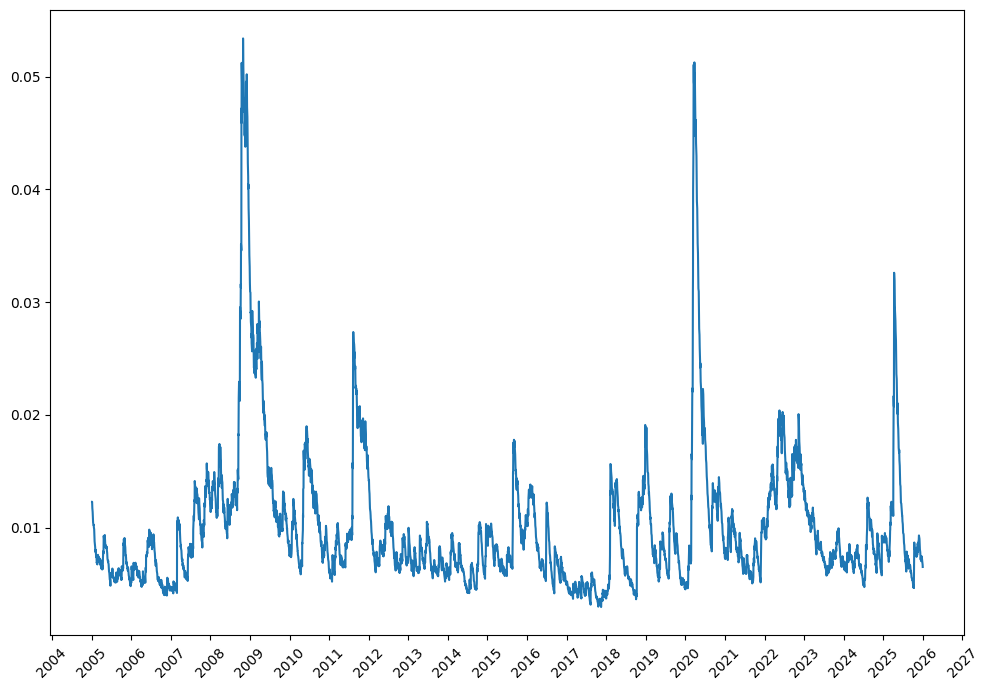

In [95]:
df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(df['Date'], df['EWMA_vol'])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()